In [ ]:
import numpy as np
from env.propagators.hierarchicalPropagator import H2CWDePropagator
from agent.agent import H2Agent
from trainer.trainer import H2TreeTrainer
p = H2CWDePropagator(3, device="cuda")
h1out_ub = [ 1000]*3 + [ 3.6]*3
h1out_lb = [-1000]*3 + [-3.6]*3
h2out_ub = [ 0.06]*3
h2out_lb = [-0.06]*3
agent = H2Agent(obs_dim=p.obs_dim,
                h1obs_dim=p.obs_dim,
                h2obs_dim=6, 
                h1out_dim=p.h1_action_dim, 
                h2out_dim=p.h2_action_dim, 
                h1a_hiddens=[512]*8, 
                h2a_hiddens=[512]*8, 
                h1c_hiddens=[512]*8,
                h1out_ub=h1out_ub, 
                h1out_lb=h1out_lb, 
                h2out_ub=h2out_ub, 
                h2out_lb=h2out_lb, 
                device="cuda")
T = H2TreeTrainer(p, agent,)

In [ ]:
loss = T.h2Pretrain(5, 100, states_num=256)

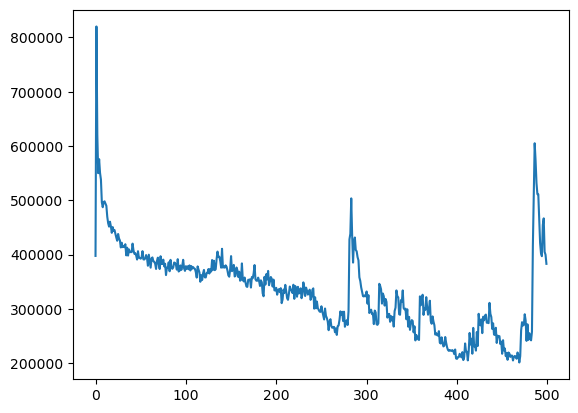

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# loss = loss_list["h2"]
# loss = -np.array(loss)
fig, ax = plt.subplots(1, 1, sharex=True,)
# ax.set_yscale("log")
ax.plot(loss)

In [ ]:
T.agent.save("../model/h2_.ptd")

In [ ]:
T.agent.load("../model/h2_.ptd")

In [ ]:
_, l, v = T.treeSim(10, 64)
print(np.mean(l))
print(v)

2172.3460693359375
-138.39578


In [ ]:
_, l, v = T.treeSim(10, 64)
print(np.mean(l))
print(v)

733.341162109375
-179.9083


In [ ]:
from trainer.myMp.mpTrainer_ import mpH2TreeTrainer
import data.buffer
h1out_ub = [ 1000]*3 + [ 3.6]*3
h1out_lb = [-1000]*3 + [-3.6]*3
h2out_ub = [ 0.06]*3
h2out_lb = [-0.06]*3
agentArgs = {"h1a_hiddens": [1024]*6, 
             "h2a_hiddens": [512]*8, 
             "h1c_hiddens": [1024]*6,
             "h1out_ub": h1out_ub, 
             "h1out_lb": h1out_lb, 
             "h2out_ub": h2out_ub, 
             "h2out_lb": h2out_lb, }
buffer_keys = ["states", "obss", "actions", "rewards", "next_states", "next_obss",
               "dones", "Q_targets", "V_targets", "regret_mc", "terminal_rewards"]
buffer = data.buffer.replayBuffer(buffer_keys, capacity=10000, batch_size=640)
mt = mpH2TreeTrainer(n_process=16, buffer=buffer, n_debris=3, agentArgs=agentArgs, 
                 select_itr=1, select_size=1, batch_size=1024, main_device="cuda", mode="alter")
# mt.main_agent.load("../model/check_point.ptd")

In [ ]:
h1td, _ = mt.main_trainer.tutorSim(None)

In [ ]:
h1td, _ = mt.main_trainer.h1Sim(None)

In [ ]:
loss = mt.main_trainer.h2Pretrain(5, 100, states_num=256)

In [ ]:
mt.train(50, 50,)

In [ ]:
from trainer.mpTrainer_ import mpH2TreeTrainer
import matplotlib.pyplot as plt
import data.buffer
action_bounds = [1000, 1000, 1000, 3.6, 3.6, 3.6]
sigma_bounds=  [1e2]*6
agentArgs = {"actor_hiddens": [512]*6, 
             "critic_hiddens": [512]*6,
             "action_bounds": action_bounds,
             "sigma_upper_bounds": sigma_bounds }
buffer_keys = ["states", "obss", "actions", "rewards", "next_states", "next_obss",
               "dones", "Q_targets", "V_targets", "regret_mc", "terminal_rewards"]
buffer = data.buffer.replayBuffer(buffer_keys, capacity=10000, batch_size=640)
mt = mpH2TreeTrainer(n_process=16, buffer=buffer, n_debris=3, agentArgs=agentArgs, 
                 select_itr=1, select_size=1, batch_size=1024, main_device="cuda", mode="SAC")
# mt.main_agent.load("../model/check_point.ptd")

In [ ]:
t = mt.main_trainer
buffer_keys = ["states", "obss", "actions", "rewards", "next_states", "next_obss", "dones"]
buffer = data.buffer.replayBuffer(buffer_keys, capacity=10000, batch_size=640)
t.buffer = buffer
t.loss_keys = ["critic_loss", "actor_loss", "alpha_loss"]
datas = t.offPolicyTrain(10, 100, states_num=20)

In [ ]:
import numpy as np
from plotting import analyze
import matplotlib.pyplot as plt
import torch
s = mt.main_trainer.prop.randomInitStates(1)
o = mt.main_trainer.prop.getObss(s)
o = o.detach().cpu().numpy()
o_a = np.hstack((o.flatten(), np.zeros(mt.main_agent.action_dim)))

n_f = mt.main_agent.critic.n_feature
axis = np.array([0,2])
axis.sort()
dims = n_f-(mt.main_agent.action_dim-axis)
o_a_ = np.delete(o_a, dims)

plt.close("all")
analyze.criticContour(mt.main_agent, span=(-5000,5000), dims=dims, step=101, singles=o_a_) # contour plot of critic in selected dims

Output()

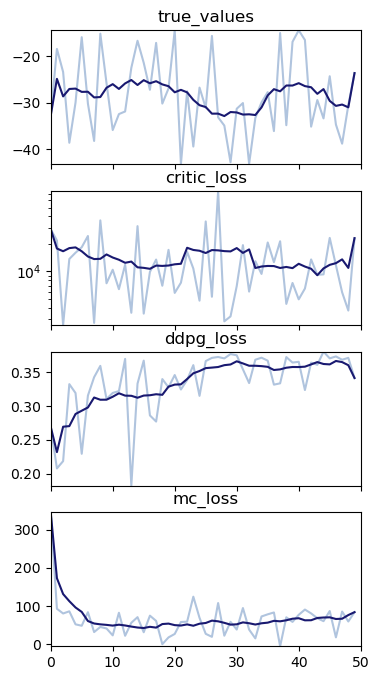

In [ ]:
mt.train(20, 50,)

In [ ]:
td, v = mt.main_trainer.h1Sim(None)

In [ ]:
td["states"][:,:,:3]

In [ ]:
mt.debug()

In [1]:
import numpy as np
from env.propagators.hierarchicalPropagator import H2CWDePropagator
from agent.agent import H2Agent
from trainer.trainer import H2TreeTrainer
prop = H2CWDePropagator(3, device="cuda", h1_step=10, h2_step=360)
h1out_ub = [ 1000]*3 + [ 3.6]*3
h1out_lb = [-1000]*3 + [-3.6]*3
h2out_ub = [ 0.06]*3
h2out_lb = [-0.06]*3
agent = H2Agent(obs_dim=prop.obs_dim,
                h1obs_dim=prop.obs_dim,
                h2obs_dim=6, 
                h1out_dim=prop.h1_action_dim, 
                h2out_dim=prop.h2_action_dim, 
                h1a_hiddens=[512]*8, 
                h2a_hiddens=[512]*8, 
                h1c_hiddens=[512]*8,
                h1out_ub=h1out_ub, 
                h1out_lb=h1out_lb, 
                h2out_ub=h2out_ub, 
                h2out_lb=h2out_lb, 
                device="cuda")
T = H2TreeTrainer(prop, agent,)

In [ ]:
T.h2Pretrain(100)

In [ ]:
T.h1Sim(states_num=128, train_h2a=True)

In [6]:
state0 = prop.randomInitStates(1)
td, state, _, h1action, _, _, _  = T.h2Sim(state0, prop_with_grad=False)

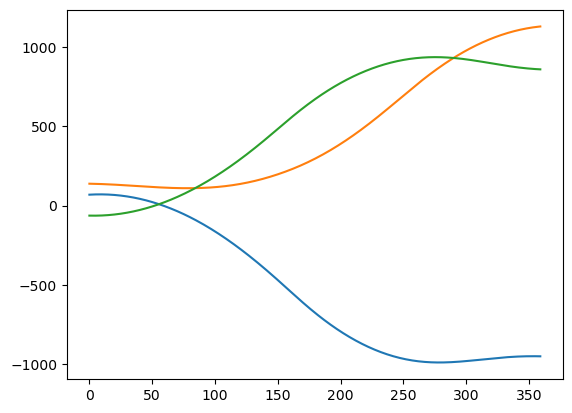

In [8]:
import matplotlib.pyplot as plt
plt.plot(td["states"][:,0,:3].detach().cpu().numpy())
plt.show()

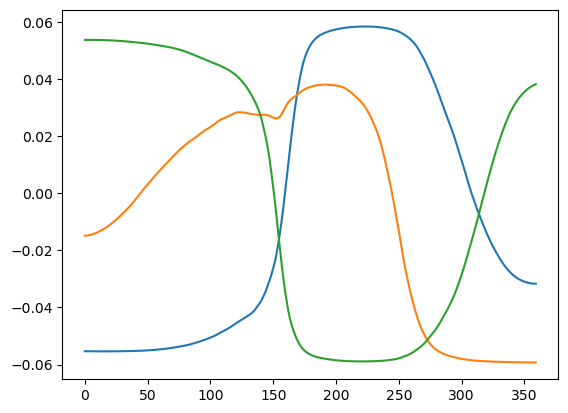

In [9]:
plt.plot(td["actions"][:,0,:3].detach().cpu().numpy())
plt.show()

In [5]:
T.agent.save("../model/h2.ptd")

In [3]:
T.agent.load("../model/h2.ptd")

In [11]:
import numpy as np
from env.propagators.hierarchicalPropagator import H2CWDePropagator
from agent.agent import H2Agent
from agent.hierarchicalAgent import CWH2_DDPG
from trainer.trainer import H2TreeTrainer
prop = H2CWDePropagator(3, device="cuda", h1_step=10, h2_step=360)
h1out_ub = [ 1000]*3 + [ 3.6]*3
h1out_lb = [-1000]*3 + [-3.6]*3
h2out_ub = [ 0.06]*3
h2out_lb = [-0.06]*3
hAgent = CWH2_DDPG(obs_dim=prop.obs_dim,
                    h1a_hiddens=[512]*6, 
                    h2a_hiddens=[512]*4, 
                    h1c_hiddens=[512]*6,
                    h1out_ub=h1out_ub, 
                    h1out_lb=h1out_lb, 
                    h2out_ub=h2out_ub, 
                    h2out_lb=h2out_lb, 
                    device="cuda")

import data.buffer
buffer_keys = ["states", "obss", "actions", "rewards", "next_states", "next_obss",
               "dones", "terminal_rewards"]
buffer = data.buffer.replayBuffer(buffer_keys, capacity=10000, batch_size=640)

from trainer.hierarchicalTrainer import H2Trainer
loss_keys = ["critic_loss", "actor_loss"]
T = H2Trainer(prop, hAgent, buffer, loss_keys)
# T.hAgent.load()
# log_dict = T.offPolicyTrain(1, 10, 128)

In [9]:
log_dict = T.offPolicyTrain(1, 100, 128)

Output()

In [24]:
loss = T.h2Pretrain(100, h1=True)

Output()

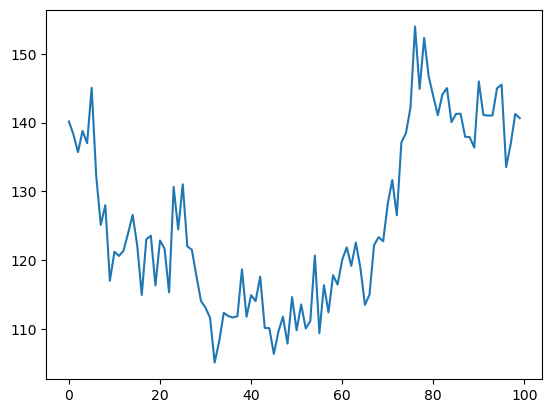

In [25]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(log_dict["total_rewards"])

In [6]:
T.hAgent.save()

In [2]:
td, _ = T.h1Sim(h1_explore_eps=0., prop_with_grad=False)

In [3]:
td["actions"][:,0,:3]

tensor([[ -2.0380, -86.7547, -93.7065],
        [-74.9629,  18.6270,  23.5695],
        [ 52.9506,   3.6525, -66.7512],
        [-19.6584, -30.3417, -25.7702],
        [-42.2419,  40.2102, -58.3154],
        [  4.1591, -26.5145, -78.8662],
        [ 78.8715,  32.6414, -66.3305],
        [ 48.0572, -20.4759,  57.0412],
        [ -0.1757,  25.0572, -81.3142],
        [ 28.6626, -38.2432, -65.2604]], device='cuda:0')

In [40]:
state0 = T.prop.randomInitStates(1)
target = (T.prop.randomInitStates(1)*5)[:,:6]
td, _, _, h1actions, _, _, _ = T.h2Sim(state0, h1actions=target, prop_with_grad=False)

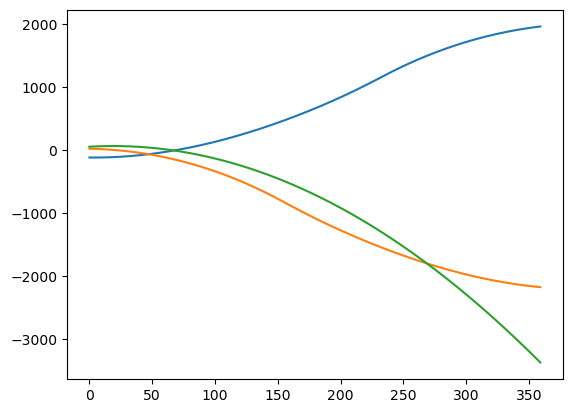

In [41]:
import matplotlib.pyplot as plt
plt.plot(td["states"][:,0,:3].detach().cpu().numpy())
plt.show()

In [42]:
td["states"][0,0,:6]+h1actions

tensor([[ 355.6050, -642.6441,  196.7760,    3.3715,    2.1705,    0.9858]],
       device='cuda:0')

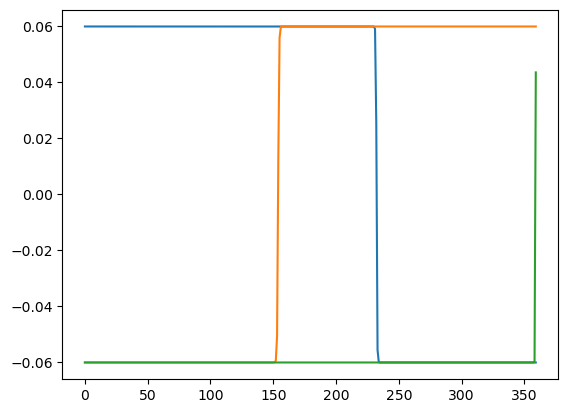

In [43]:
plt.plot(td["actions"][:,0,:3].detach().cpu().numpy())
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from env.propagators.hierarchicalPropagator import thrustCWPropagator
from agent.hierarchicalAgent import thrustCW_DDPG
prop = thrustCWPropagator(3, device="cuda", h1_step=10, h2_step=360)
h1out_ub = [ 3.6]*3
h1out_lb = [-3.6]*3
h2out_ub = [ 0.06]*3
h2out_lb = [-0.06]*3
hAgent = thrustCW_DDPG(obs_dim=prop.obs_dim,
                    h1a_hiddens=[512]*3, 
                    h2a_hiddens=[512]*3, 
                    h1c_hiddens=[512]*3,
                    h1out_ub=h1out_ub, 
                    h1out_lb=h1out_lb, 
                    h2out_ub=h2out_ub, 
                    h2out_lb=h2out_lb, 
                    device="cuda")

import data.buffer
buffer_keys = ["states", "obss", "actions", "rewards", "next_states", "next_obss",
               "dones", "terminal_rewards"]
buffer = data.buffer.replayBuffer(buffer_keys, capacity=10000, batch_size=640)

from trainer.hierarchicalTrainer import thrustCWTrainer
loss_keys = ["critic_loss", "actor_loss"]
T = thrustCWTrainer(prop, hAgent, buffer, loss_keys)

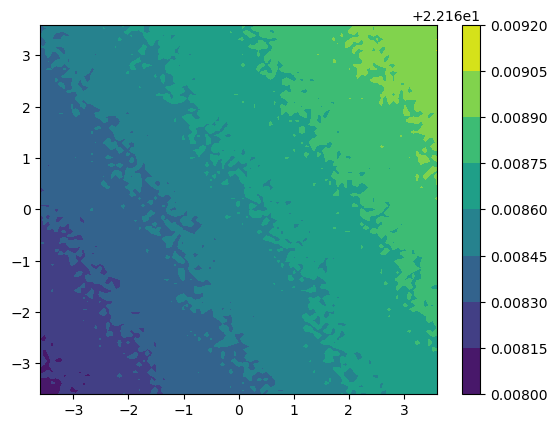

In [84]:
import numpy as np
from plotting import analyze
import matplotlib.pyplot as plt
import torch
s = T.prop.randomInitStates(1)
o = T.prop.getObss(s)
o = o.detach().cpu().numpy()
o_a = np.hstack((o.flatten(), np.zeros(T.hAgent[0].action_dim)))

n_f = T.hAgent[0].critic.n_feature
axis = np.array([1,2])
axis.sort()
dims = n_f-(T.hAgent[0].action_dim-axis)
o_a_ = np.delete(o_a, dims)

plt.close("all")
analyze.criticContour(T.hAgent[0], span=(-3.6,3.6), dims=dims, step=101, singles=o_a_)
# contour plot of critic in selected dims

In [40]:
logs = T.offPolicyTrain(1, 100, states_num=128, h1_explore_eps=.5)

Output()

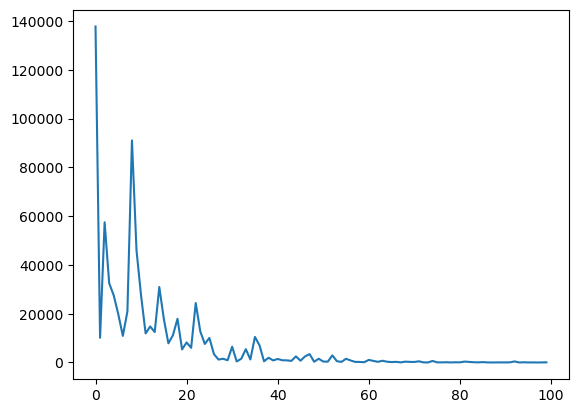

In [85]:
plt.plot(logs["critic_loss"])

In [95]:
T.hAgent.save()

In [37]:
td, r = T.h1Sim(h1_explore_eps=0.)

In [ ]:
td["actions"][:,0,:3]

In [ ]:
td["rewards"]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from env.propagators.hierarchicalPropagator import thrustCWPropagator
from agent.hierarchicalAgent import thrustCW_SAC
prop = thrustCWPropagator(3, device="cuda", h1_step=10, h2_step=360)
h1out_ub = [ 3.6]*3
h1out_lb = [-3.6]*3
h2out_ub = [ 0.06]*3
h2out_lb = [-0.06]*3
hAgent = thrustCW_SAC(obs_dim=prop.obs_dim,
                      action_bounds=h1out_ub,
                      sigma_upper_bounds=[1]*3,
                      h1a_hiddens=[512]*6, 
                      h2a_hiddens=[512]*4, 
                      h1c_hiddens=[512]*6,
                      h2out_ub=h2out_ub, 
                      h2out_lb=h2out_lb, 
                      device="cuda")

import data.buffer
buffer_keys = ["states", "obss", "actions", "rewards", "next_states", "next_obss",
               "dones", "terminal_rewards"]
buffer = data.buffer.replayBuffer(buffer_keys, capacity=10000, batch_size=640)

from trainer.hierarchicalTrainer import thrustCWTrainer
loss_keys = ["critic_loss", "actor_loss"]
T = thrustCWTrainer(prop, hAgent, buffer, loss_keys)

In [14]:
logs = T.offPolicyTrain(1, 10, 128, h1_explore_eps=0.)

Output()

In [ ]:
logs["critic_loss"]

In [24]:
td, r = T.h1Sim(h1_explore_eps=0.)

In [ ]:
td["actions"][:,0,:3]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from env.propagators.hierarchicalPropagator import optCWPropagator
from agent.net import boundedFcNet
prop = optCWPropagator(3, device="cuda", h1_step=10, h2_step=360)
h2out_ub = [ 0.6]*3
h2out_lb = [-0.6]*3
actor = boundedFcNet(prop.obs_dim, prop.h2_action_dim, [512]*6, h2out_ub, h2out_lb).to("cuda")
opt = torch.optim.SGD(actor.parameters(), lr=0.001)

In [2]:
tr, td = prop.impulseOpt(actor, sigma=0, impulse_scale=0.6)

In [32]:
td["actions"][:,0,:3]

tensor([[ 4.4689e-02,  4.4046e-02, -1.6668e-04],
        [ 4.6099e-02,  4.4668e-02,  8.4817e-05],
        [ 3.9899e-02,  3.4776e-02, -2.2749e-03],
        [ 3.9015e-02,  3.3826e-02, -1.8505e-03],
        [ 4.0338e-02,  3.6203e-02, -6.5029e-05],
        [ 4.5459e-02,  3.7025e-02, -1.2488e-03],
        [ 4.8292e-02,  4.2909e-02,  2.2448e-03],
        [ 5.0357e-02,  4.3691e-02,  1.2339e-03],
        [ 4.8317e-02,  3.9245e-02, -1.0782e-03],
        [ 4.8763e-02,  3.8448e-02, -2.9328e-03]], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [3]:
td["rewards"][:,0]

tensor([ -92159.5469, -178190.2188, -300975.5312, -423129.6250, -515051.1250,
        -553134.0000, -532581.9375, -492692.7188, -541788.2500, -762341.0625],
       device='cuda:0', grad_fn=<SelectBackward0>)

In [ ]:
from rich.progress import Progress
TR = []
I = 1
J = 100
with Progress() as P:
    for i in range(I):
        task = P.add_task(f"Task{i}", total=J)
        for j in range(J):
            tr, _ = prop.impulseOpt(actor, sigma=0.006, impulse_scale=0.6)
            loss = -tr
            opt.zero_grad()
            loss.backward()
            opt.step()
            TR.append(tr.item())
            P.update(task, advance=1)
plt.plot(TR)
plt.show()

测试 `implusePropagator`

In [1]:
from env.propagators.hierarchicalPropagator import impulsePropagator
from agent.net import boundedFcNet
import torch
import data.dicts as D
import matplotlib.pyplot as plt

# impulse_bound = 0.6
impulse_bound = torch.inf
prop = impulsePropagator(3, device="cuda", h1_step=10, h2_step=360, impulse_bound=impulse_bound)
h2out_ub = [ impulse_bound]*3
h2out_lb = [-impulse_bound]*3
actor = boundedFcNet(prop.obs_dim, prop.h2_action_dim, [512]*6, h2out_ub, h2out_lb).to("cuda")
opt = torch.optim.SGD(actor.parameters(), lr=0.001)

Output()

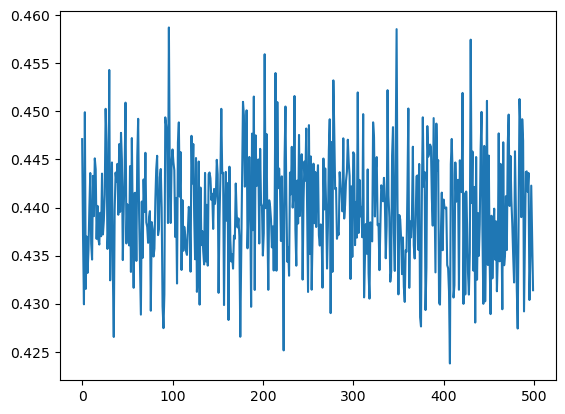

In [8]:
from rich.progress import Progress
LOSS = []
I = 1
J = 500
horizon = 360
with Progress() as P:
    for i in range(I):
        task = P.add_task(f"Task{i}", total=J)
        for j in range(J):
            loss, td = prop.impulseOpt(actor, horizon=horizon)
            opt.zero_grad()
            loss.backward()
            opt.step()
            LOSS.append(loss.item())
            P.update(task, advance=1)
plt.plot(LOSS)
plt.show()

In [41]:
loss, td = prop.impulseOpt(actor, horizon=360)

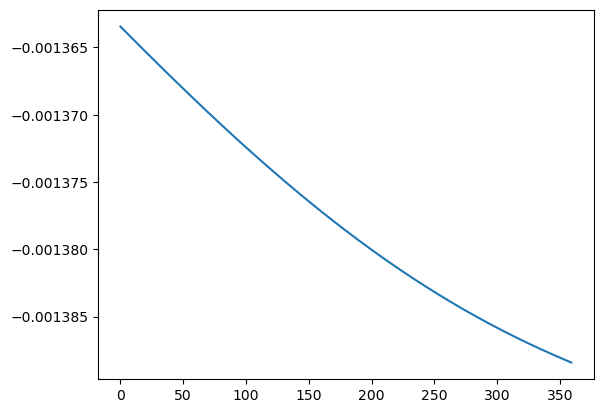

In [42]:
td["rewards"][:,0]
plt.plot(td["rewards"][:,0].detach().cpu().numpy())
plt.show()

In [10]:
td["actions"][:,0,:3]

tensor([[ 0.0196, -0.0482,  0.0170],
        [ 0.0012, -0.0677,  0.0124],
        [ 0.0086, -0.0391, -0.0134],
        ...,
        [ 0.0225, -0.0347,  0.0034],
        [ 0.0134, -0.0483, -0.0156],
        [ 0.0087, -0.0459, -0.0064]], device='cuda:0',
       grad_fn=<SelectBackward0>)

研究梯度消失

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from env.propagators.hierarchicalPropagator import optCWPropagator
from agent.net import boundedFcNet
prop = optCWPropagator(3, device="cuda", h1_step=10, h2_step=360)
h2out_ub = [ 0.6]*3
h2out_lb = [-0.6]*3
actor = boundedFcNet(prop.obs_dim, 3, [512]*6, h2out_ub, h2out_lb).to("cuda")
opt = torch.optim.Adam(actor.parameters(), lr=0.001)

In [129]:
L = []
for _ in range(1000):
    states = prop.randomInitStates(1024)
    obss = prop.getObss(states)
    # obss = torch.randn(256, actor.n_feature).to(actor.device)
    actions = actor(obss)
    loss = torch.sum(torch.abs(actions), dim=-1).mean()
    opt.zero_grad()
    loss.backward()
    opt.step()
    L.append(loss.item())

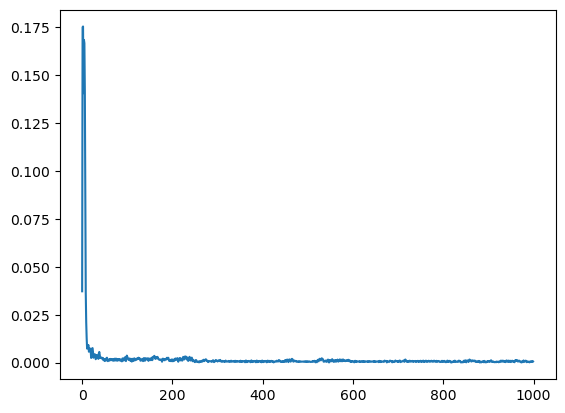

In [130]:
plt.plot(L)

In [26]:
states = prop.randomInitStates(256)
obss = prop.getObss(states)
actions = actor(obss)
loss = torch.sum(torch.abs(actions), dim=-1).mean()
opt.zero_grad()
loss.backward()
opt.step()

测试罚函数

In [3]:
import numpy as np
import torch
import utils
x = np.linspace(-10,10,100)
x_ = torch.from_numpy(x)
y_ = utils.penaltyFuncPosi(x_, k=1/4)
y = y_.detach().cpu().numpy()

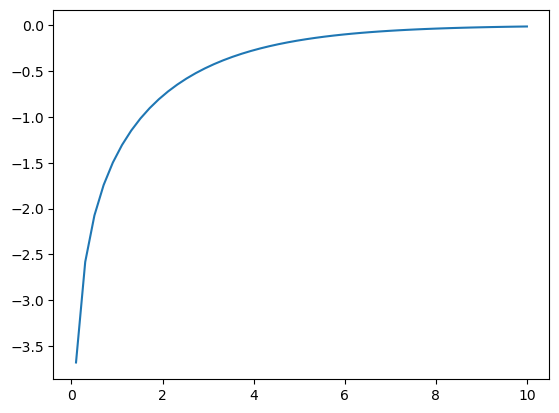

In [4]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

测试 `impulsePropagator.getPlanRewards`

In [1]:
from env.propagators.hierarchicalPropagator import impulsePropagator
from agent.net import boundedFcNet
import torch
import data.dicts as D
import matplotlib.pyplot as plt
from agent.net import fcNet

impulse_bound = 5000.
prop = impulsePropagator(3, device="cuda", h1_step=10, h2_step=360, impulse_bound=impulse_bound)
h2out_ub = [ impulse_bound]*3
h2out_lb = [-impulse_bound]*3
actor = boundedFcNet(prop.n_debris*6, 3, [128]*2, h2out_ub, h2out_lb).to("cuda")
opt = torch.optim.SGD(actor.parameters(), lr=0.0001)

Output()

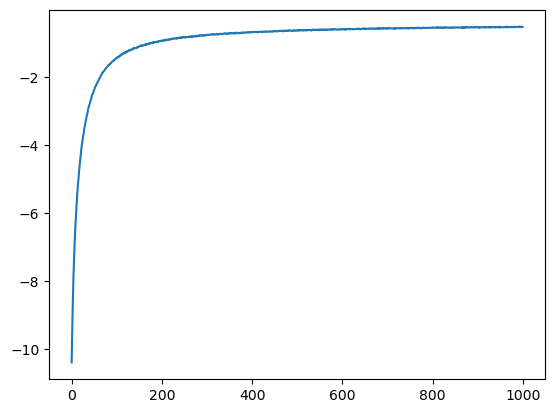

In [138]:
from rich.progress import Progress
Rewards = []
Adv_loss = []
I = 100
J = 10
batch_size = 16000
sigma = prop.max_dist
sigma_min = sigma/100
gamma = 0.99
with Progress() as P:
    task = P.add_task("Task0", total=J)
    for i in range(I):
        P.tasks[task].description = f"Task{i}"
        P.tasks[task].completed = 0
        for j in range(J):
            s0 = prop.randomInitStates(batch_size)
            o0 = prop.getObss2(s0)
            targets = actor(o0)
            rewards0, rewards1, adv_loss = prop.getPlanRewards(s0, targets, sigma=sigma)
            rewards = (rewards0+rewards1)/2
            # loss = -rewards.mean()+adv_loss.mean()
            # loss = adv_loss.mean()
            loss = -rewards.mean()
            opt.zero_grad()
            loss.backward()
            opt.step()
            Rewards.append(rewards0.mean().item())
            Adv_loss.append(adv_loss.mean().item())
            P.update(task, advance=1)
        if sigma>sigma_min:
            sigma *= gamma
plt.plot(Rewards)
plt.show()

Output()

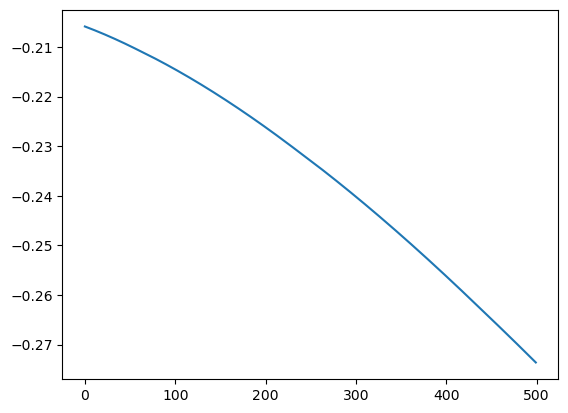

In [3]:
from rich.progress import Progress
Rewards = []
Adv_loss = []
I = 1
J = 500
batch_size = 1
seed = 1
sigma = prop.max_dist
sigma_min = sigma/100
gamma = 0.99
with Progress() as P:
    task = P.add_task("Task0", total=J)
    for i in range(I):
        P.tasks[task].description = f"Task{i}"
        P.tasks[task].completed = 0
        for j in range(J):
            s0 = prop.randomInitStates(batch_size, seed=seed)
            o0 = prop.getObss2(s0)
            targets = actor(o0)
            rewards0, rewards1, adv_loss = prop.getPlanRewards(s0, targets, sigma=sigma)
            rewards = (rewards0+rewards1)/2
            # loss = -rewards.mean()+adv_loss.mean()
            # loss = adv_loss.mean()
            loss = -rewards.mean()
            opt.zero_grad()
            loss.backward()
            opt.step()
            Rewards.append(rewards0.mean().item())
            Adv_loss.append(adv_loss.mean().item())
            P.update(task, advance=1)
        if sigma>sigma_min:
            sigma *= gamma
plt.plot(Rewards)
plt.show()

In [4]:
s0 = prop.randomInitStates(128)
o0 = prop.getObss2(s0)
targets = actor(o0)

In [ ]:
rewards0, rewards1, adv_loss = prop.getPlanRewards(s0, targets, sigma=5000)
rewards = (rewards0 + rewards1)/2
loss = -rewards.mean()+adv_loss.mean()
opt.zero_grad()
loss.backward()
gs = [p.grad for p in actor.parameters()]
print(gs)
opt.step()

测试`impulsePropagator.best_targets`

In [34]:
from env.propagators.hierarchicalPropagator import impulsePropagator
import torch
import matplotlib.pyplot as plt

impulse_bound = 0.6
prop = impulsePropagator(3, device="cuda", h1_step=10, h2_step=360, 
                         impulse_bound=impulse_bound)
s0 = prop.randomInitStates(10)
Targets, best_i, Rewards, = prop.best_targets(s0, population=100, max_loop=20000, lr=1e-1)

d:\code\workshop\genetic tree search\env\propagators\hierarchicalPropagator.py:670: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(targets, requires_grad=True, device=self.device)


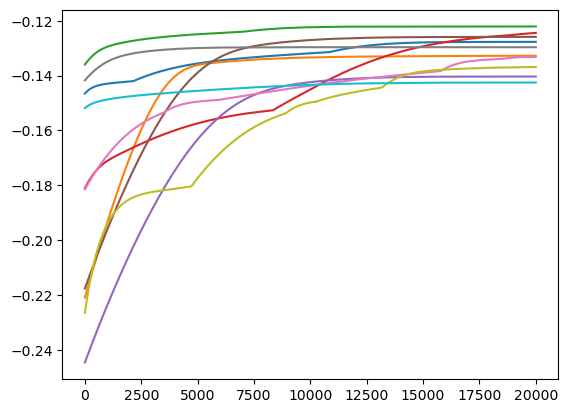

In [35]:
plt.close("all")
plt.plot(Rewards.transpose(0,1).cpu().numpy())
plt.show()

In [ ]:
Targets[best_i]

测试`impulsePropagator.best_impulses`

In [1]:
from env.propagators.hierarchicalPropagator import impulsePropagator
import torch
import matplotlib.pyplot as plt

impulse_bound = 0.1
prop = impulsePropagator(3, device="cuda", h1_step=30, h2_step=120, 
                         impulse_bound=impulse_bound, safe_dist=2000.)
batch_size = 320
max_loop = 15
impulse_num = 20

In [217]:
from agent.net import boundedLSTM
upper_bounds = [ impulse_bound]*3
lower_bounds = [-impulse_bound]*3
actor = boundedLSTM(n_feature=prop.obs_dim, 
               n_output=3, 
               n_lstm_hidden=3, 
               n_lstm_layer=64, 
               fc_hiddens=[], 
               upper_bounds=upper_bounds, 
               lower_bounds=lower_bounds,
               batch_first=False).to("cuda")
opt1 = torch.optim.Adam(actor.parameters(), lr=0.0001)

In [226]:
import torch
from agent.net import boundedFcNet
upper_bounds = [ impulse_bound]*3
lower_bounds = [-impulse_bound]*3
actor = boundedFcNet(prop.obs_dim, 3, [512]*4, 
                     upper_bounds=upper_bounds, 
                     lower_bounds=lower_bounds).to("cuda")
opt1 = torch.optim.Adam(actor.parameters(), lr=0.001)

In [ ]:
s0 = prop.randomInitStates(batch_size)
imp, best_i, rewards = prop.best_impulses(s0, max_loop=max_loop, impulse_num=impulse_num)
best_imp = torch.zeros((imp.shape[0], imp.shape[2], imp.shape[3]), device=imp.device)
for i in range(batch_size):
    best_imp[i,...] = imp[i,best_i[i],...]
td1, td2 = prop.impulses_test(s0, best_imp)
plt.plot(rewards.transpose(0,1).detach().cpu().numpy())
plt.show()

In [ ]:
i = 0
idx = best_i[i].item()
#idx = 5
imp_norm = torch.norm(imp, dim=-1)
plt.plot(imp[i,idx].detach().cpu().numpy())
plt.plot(imp_norm[i,idx].detach().cpu().numpy())
plt.show()

In [15]:
states = td1["states"]
decoded = prop.statesDecode(states)
primal_pos = decoded["primal"][:,:,:3]
debris_pos = decoded["debris"][:,:,:3]
d2d = torch.norm(primal_pos-debris_pos, dim=-1)
plt.plot(d2d.detach().cpu().numpy())
plt.show()

In [ ]:
data = []
label = []
for epoch in range(40):
    s0 = prop.randomInitStates(batch_size)
    imp, best_i, rewards = prop.best_impulses(s0, max_loop=max_loop, impulse_num=impulse_num)
    best_imp = torch.zeros((imp.shape[0], imp.shape[2], imp.shape[3]), device=imp.device)
    for i in range(batch_size):
        best_imp[i,...] = imp[i,best_i[i],...]
    best_imp_ = best_imp.transpose(0,1)

    td1, td2 = prop.impulses_test(s0, best_imp)

    data.append(td1["obss"].detach().cpu())
    label.append(best_imp_.detach().cpu())
data = torch.cat(data, dim=1)
label = torch.cat(label, dim=1)
torch.save(data, "../model/sv/data0.pt")
torch.save(label, "../model/sv/label0.pt")

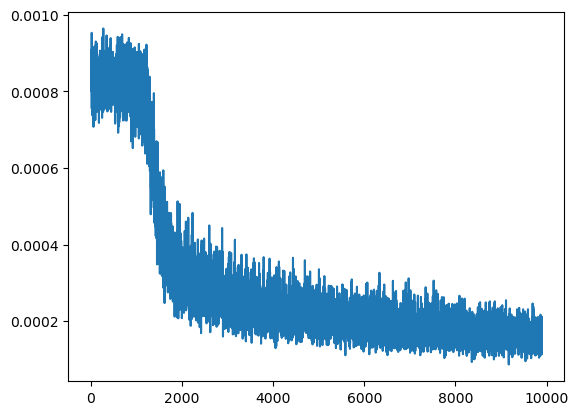

In [227]:
import numpy as np
loss_list = []
total = data.shape[1]
mini_batch = 64
epoch = int(total/mini_batch)
epoch = 10000
for j in range(epoch):
    idx = np.random.choice(total, mini_batch, replace=False)
    # idx = np.arange(j*mini_batch, (j+1)*mini_batch)
    obss = data[:, idx]
    out = actor(obss)
    loss = torch.nn.functional.mse_loss(label[:,idx], out, reduction='mean')
    opt1.zero_grad()
    loss.backward()
    opt1.step()
    loss_list.append(loss.item())
# print(loss.item())
plt.plot(loss_list[100:])
plt.show()

In [ ]:
# gradient vanishing?
obss = data
out = actor(obss)
opt1.zero_grad()
loss = torch.abs(out).mean()
loss.backward()
g = [p.grad for p in actor.parameters()]
print(g)

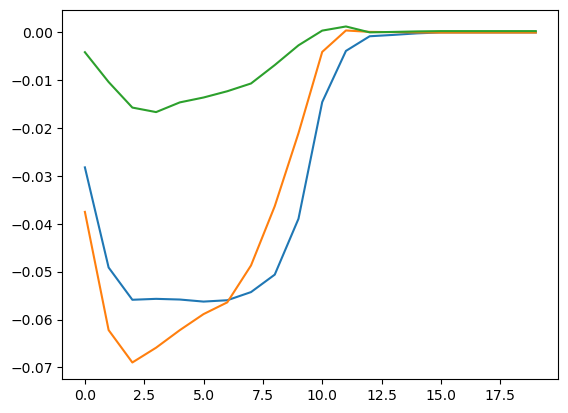

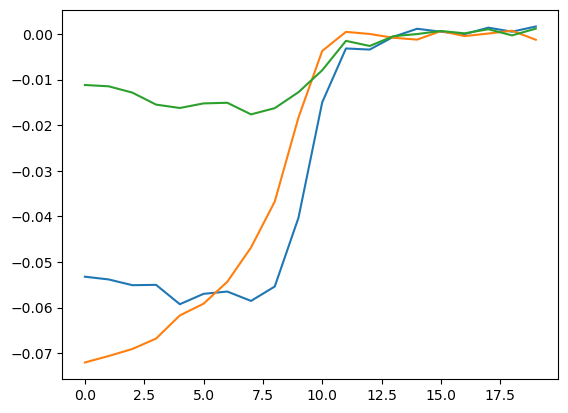

In [278]:
i = 0
i = np.random.randint(0, total)
plt.plot(out[:,i].detach().cpu().numpy())
plt.show()
plt.plot(label[:,i].detach().cpu().numpy())
plt.show()

测试`mpImpulsesTrainer`

In [1]:
from trainer.myMp.mpTrainer_ import mpImpulsesTrainer
from agent.net import boundedLSTM
impulse_bound = 0.1
upper_bounds = [ impulse_bound]*3
lower_bounds = [-impulse_bound]*3
actor = boundedLSTM(n_feature=47, 
               n_output=3, 
               n_lstm_hidden=3, 
               n_lstm_layer=16, 
               fc_hiddens=[], 
               upper_bounds=upper_bounds, 
               lower_bounds=lower_bounds,
               batch_first=False).to("cuda")
T = mpImpulsesTrainer(8, actor, n_debris=3, impulse_bound=impulse_bound)

In [ ]:
res = T.debug()